In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from src.util import splitData, preprocess
from tensorflow.keras.models import load_model
from src.eval import rmse, get_prediction

In [2]:
# You may change the following paths to your own paths
test_genes = pd.read_csv('common_gene.txt', index_col=0)
keep_gene = ['malignant', 'normal']+list(test_genes['gene'].values)

subjects = ['AML328-D29', 'AML1012-D0', 'AML556-D0', 'AML328-D171', 
            'AML210A-D0', 'AML419A-D0', 'AML328-D0', 'AML707B-D0',
            'AML916-D0', 'AML328-D113', 'AML329-D0', 'AML420B-D0',
            'AML329-D20', 'AML921A-D0', 'AML475-D0'
        ]
cells = 500
path = './aml_simulated_bulk_data/sample_' + str(cells) + '/'
with open(path + 'range_results/diff_maxs.pkl', 'rb') as f:
    diff_maxs = pickle.load(f)
with open(path + 'range_results/diff_mins.pkl', 'rb') as f:
    diff_mins = pickle.load(f)
with open(path + 'range_results/idfs.pkl', 'rb') as f:
    idfs = pickle.load(f)
with open(path + 'range_results/merge_diff.pkl', 'rb') as f:
    diff = pickle.load(f)
models = collections.defaultdict(list)

for i in range(15):
    sub = subjects[i]
    for j in range(0, 100, 10):
        for k in range(j+10, 101, 10):
            model_path = path + 'range_'+ str(j) + '_' + str(k) + '/'
            m = load_model(model_path+'models/'+sub+'_deepdecon_tf_idf_normalized_m256.h5', custom_objects={'rmse':rmse})
            models[str(j) + '_' + str(k)].append(m)
print(models.keys())

dict_keys(['0_10', '0_20', '0_30', '0_40', '0_50', '0_60', '0_70', '0_80', '0_90', '0_100', '10_20', '10_30', '10_40', '10_50', '10_60', '10_70', '10_80', '10_90', '10_100', '20_30', '20_40', '20_50', '20_60', '20_70', '20_80', '20_90', '20_100', '30_40', '30_50', '30_60', '30_70', '30_80', '30_90', '30_100', '40_50', '40_60', '40_70', '40_80', '40_90', '40_100', '50_60', '50_70', '50_80', '50_90', '50_100', '60_70', '60_80', '60_90', '60_100', '70_80', '70_90', '70_100', '80_90', '80_100', '90_100'])


In [3]:
preds = []
labels = []

for i in range(15):
    sub = subjects[i]
    val = pd.read_csv(path+'range_0_100/'+sub+'_bulk_nor_500_200.txt', index_col = 0)
    X_val, y_val = splitData(val[keep_gene])
    labels.append(y_val.values[:, 0])

    pred = get_prediction(X_val.values, models, idfs, i, diff_mins, diff_maxs, diff=diff)
    preds.append(pred[:, 0])

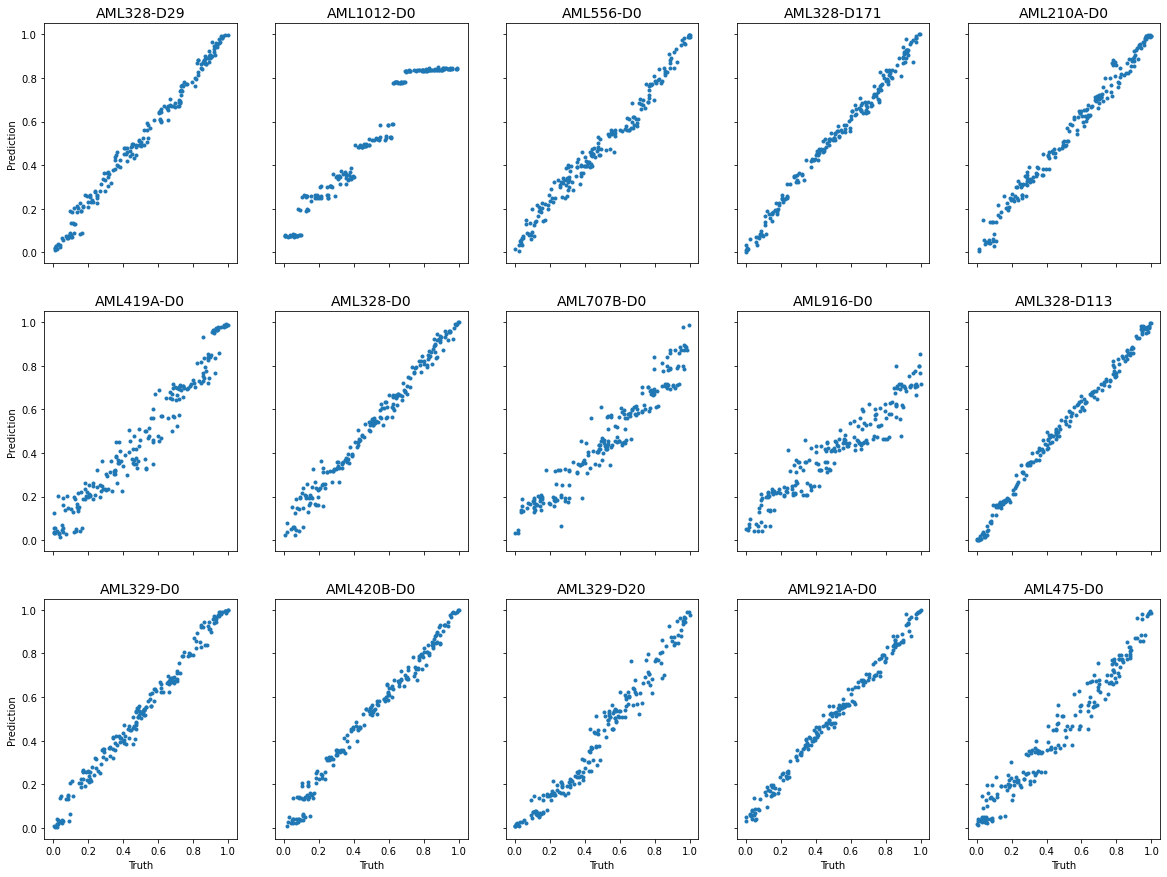

In [9]:
fig, axs = plt.subplots(3, 5, figsize=(20,15), sharex=True, sharey=True, constrained_layout=False)
for i in range(len(subjects)):
    name= subjects[i]
    ax = axs[i//5, i%5]
    ax.plot(labels[i], preds[i], '.')
    ax.set_title(name, fontsize=14)

for ax in axs.flat:
    ax.set(xlabel='Truth', ylabel='Prediction')

for ax in axs.flat:
    ax.label_outer()
    
plt.show()